In [9]:
from oniakRun.aggregate_result import aggregate_result

ks = [8]
root = "/media/mydrive/CDMA"

import json, os
import numpy as np

filename = os.path.join(root, "result/zipf/cm{}_k{}_d{}_id*.json")
xs = np.arange(7300, 8001, 100)
ys = {}
cm = {}
agg_keys = {
    "success": "avg",
    "num peels": ("avg", "if", lambda dik: dik["success"]),
    "num rounds": ("avg", "if", lambda dik: dik["success"]),
    "time": ("avg", "if", lambda dik: dik["success"]),
}

for k in ks:
    for x in xs:
        ys[k, x] = aggregate_result(filename.format(False, k, x), agg_keys)
        cm[k, x] = aggregate_result(filename.format(True, k, x), agg_keys)
        
# ys, cm

<Axes: title={'center': 'Successes Out of 1000'}, xlabel='Sketch Size (\\# Counters)', ylabel='Success Rate'>

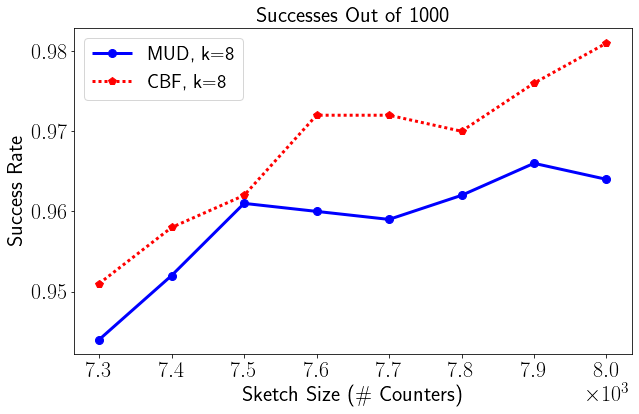

In [6]:
from oniakPlot import line_plot

data = [(xs, np.array([ys[k, x]["success"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["success"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CBF, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Success Rate", 
                      "Successes Out of 1000", "plots/zipf_success.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'Decoding time'}, xlabel='Sketch Size (\\# Counters)', ylabel='Time (s)'>

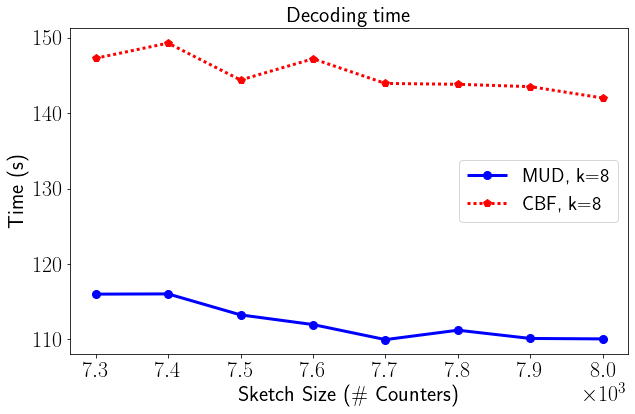

In [7]:
data = [(xs, np.array([ys[k, x]["time"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["time"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CBF, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Time (s)", "Decoding time", "plots/zipf_time.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'Successes Out of 1000'}, xlabel='Sketch Size (\\# Counters)', ylabel='Success Rate'>

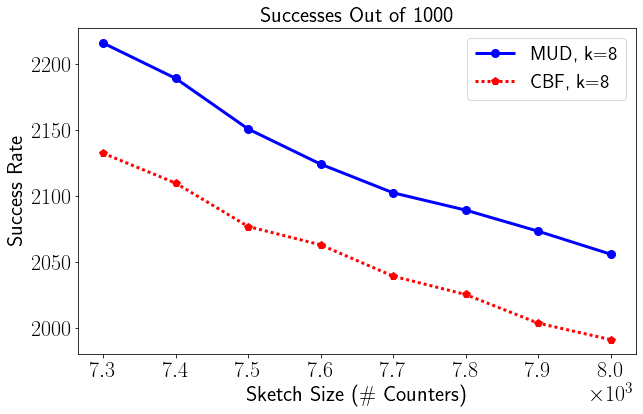

In [11]:
data = [(xs, np.array([ys[k, x]["num peels"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["num peels"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CBF, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Number of Peels", 
                      "Successes Out of 1000", savepath=None,
                      figsize=(10, 6))

<Axes: title={'center': 'Successes Out of 1000'}, xlabel='Sketch Size (\\# Counters)', ylabel='Number of Rounds'>

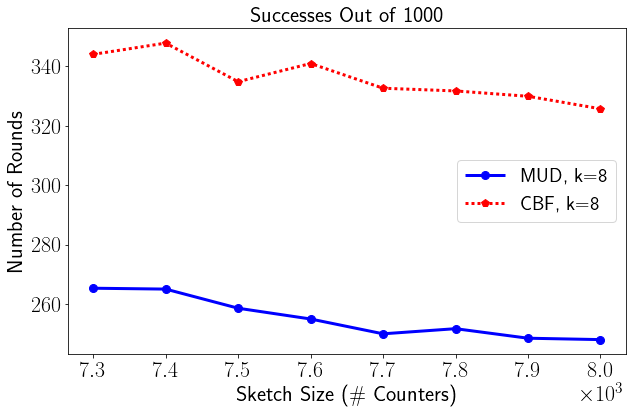

In [12]:
data = [(xs, np.array([ys[k, x]["num rounds"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["num rounds"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CBF, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Number of Rounds", 
                      "Successes Out of 1000", savepath=None,
                      figsize=(10, 6))

In [3]:
with open("result/zipf/summary/aggregated_mud.json", "w") as f:
    json.dump({str(k): v for k, v in ys.items()}, f)
with open("result/zipf/summary/aggregated_cm.json", "w") as f:
    json.dump({str(k): v for k, v in cm.items()}, f)


In [3]:
ys, cm

({(8, 7300): {'success': None, 'normtime': None},
  (8, 7400): {'success': None, 'normtime': None},
  (8, 7500): {'success': None, 'normtime': None},
  (8, 7600): {'success': None, 'normtime': None},
  (8, 7700): {'success': None, 'normtime': None},
  (8, 7800): {'success': None, 'normtime': None},
  (8, 7900): {'success': None, 'normtime': None},
  (8, 8000): {'success': None, 'normtime': None}},
 {(8, 7300): {'success': None, 'normtime': None},
  (8, 7400): {'success': None, 'normtime': None},
  (8, 7500): {'success': None, 'normtime': None},
  (8, 7600): {'success': None, 'normtime': None},
  (8, 7700): {'success': None, 'normtime': None},
  (8, 7800): {'success': None, 'normtime': None},
  (8, 7900): {'success': None, 'normtime': None},
  (8, 8000): {'success': None, 'normtime': None}})